In [2]:
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import matplotlib.pyplot as plt

# Chargement des variables d'environnement
load_dotenv('.env')
API_PASSWORD = os.getenv("API_PASSWORD")
API_URL = "http://127.0.0.1:8000"

# Initialisation de la session
session = requests.Session()

# AUTHENTIFICATION : Récupération du token JWT
response = session.post(f"{API_URL}/token", json={"password": API_PASSWORD, "duration": 3600})
if response.status_code == 200:
    token = response.json()["token"]
    session.headers.update({"Authorization": f"Bearer {token}"})
    print("Authentification réussie !")
else:
    print("Échec de l'authentification :", response.json())
    token = None

# Vérifier si l'authentification a réussi avant de poursuivre
if token:
    
    # REQUÊTE : Recherche de biens selon un intervalle de prix
    prix_min = 150000
    prix_max = 300000
    response = session.get(f"{API_URL}/biens/filtre-prix", params={"prix_min": prix_min, "prix_max": prix_max})
    
    if response.status_code == 200:
        biens_prix = response.json()
        print(f"Nombre de biens trouvés pour le prix ({prix_min}-{prix_max}) :", len(biens_prix))
    else:
        print("Erreur lors de la récupération des biens par prix :", response.json())
    
    # REQUÊTE : Recherche de biens selon un intervalle de surface habitable
    surface_min = 50
    surface_max = 150
    response = session.get(f"{API_URL}/biens/filtre-surface", params={"surface_min": surface_min, "surface_max": surface_max})
    
    if response.status_code == 200:
        biens_surface = response.json()
        print(f"Nombre de biens trouvés pour la surface ({surface_min}-{surface_max} m²) :", len(biens_surface))
    else:
        print("Erreur lors de la récupération des biens par surface :", response.json())
    
    # ANALYSE : Conversion en DataFrame pour affichage structuré
    if biens_prix:
        df_prix = pd.DataFrame(biens_prix)
        print("\nAperçu des biens filtrés par prix :")
        display(df_prix.head())
    
    if biens_surface:
        df_surface = pd.DataFrame(biens_surface)
        print("\nAperçu des biens filtrés par surface :")
        display(df_surface.head())

Authentification réussie !
Nombre de biens trouvés pour le prix (150000-300000) : 485
Nombre de biens trouvés pour la surface (50-150 m²) : 656

Aperçu des biens filtrés par prix :


,id_appartement,ref_annonce,prix,prix_au_m2,surf_hab_m2,nb_piece,nb_chambre,num_etage,lab_dpe,conso_elec,lab_gpe,emis_gpe,lien_appartement,date_maj,id_locale
0,3,ParuVendu 1652711,193000,2539,76,5,3,1,E,283,C,23,https://www.paruvendu.fr/immobilier/vente/appa...,2025-02-27T16:30:00,4
1,4,ParuVendu 455OQ 3 PIECES RENNES (35000)-284900,284900,4595,62,3,2,,NC,0,NC,0,https://www.paruvendu.fr/immobilier/vente/appa...,2025-03-01T22:33:00,4
2,5,ParuVendu 266320,195000,2532,77,4,3,,E,284,C,23,https://www.paruvendu.fr/immobilier/vente/appa...,2025-02-05T08:05:00,4
3,6,ParuVendu W99Y STUDIO RENNES (35700) 8-183500,183500,6796,27,1,0,,NC,0,NC,0,https://www.paruvendu.fr/immobilier/vente/appa...,2025-02-23T22:51:00,4
4,7,ParuVendu 830036329251,229900,3331,69,4,2,9,D,197,C,27,https://www.paruvendu.fr/immobilier/vente/appa...,2025-03-02T05:15:00,4



Aperçu des biens filtrés par surface :


,id_appartement,ref_annonce,prix,prix_au_m2,surf_hab_m2,nb_piece,nb_chambre,num_etage,lab_dpe,conso_elec,lab_gpe,emis_gpe,lien_appartement,date_maj,id_locale
0,3,ParuVendu 1652711,193000,2539,76,5,3,1,E,283,C,23,https://www.paruvendu.fr/immobilier/vente/appa...,2025-02-27T16:30:00,4
1,4,ParuVendu 455OQ 3 PIECES RENNES (35000)-284900,284900,4595,62,3,2,,NC,0,NC,0,https://www.paruvendu.fr/immobilier/vente/appa...,2025-03-01T22:33:00,4
2,5,ParuVendu 266320,195000,2532,77,4,3,,E,284,C,23,https://www.paruvendu.fr/immobilier/vente/appa...,2025-02-05T08:05:00,4
3,7,ParuVendu 830036329251,229900,3331,69,4,2,9,D,197,C,27,https://www.paruvendu.fr/immobilier/vente/appa...,2025-03-02T05:15:00,4
4,8,ParuVendu 1411805_17668,199900,2467,81,4,3,2,D,186,C,15,https://www.paruvendu.fr/immobilier/vente/appa...,2025-02-28T08:09:00,4


Authentification réussie !
Nombre d'indicateurs trouvés pour l'année 2023 : 1276
Nombre d'indicateurs trouvés pour la commune Rennes : 154

Aperçu des indicateurs pour l'année spécifiée :


,annee_mutation,code_geo,libelle_geo,valeur_fonciere_median_cod111,prix_m2_median_cod111,surface_batie_median_cod111
0,2023,35238,Rennes,482365.0,5042.7,99.5
1,2023,35144,Langan,{'$numberDouble': 'NaN'},{'$numberDouble': 'NaN'},{'$numberDouble': 'NaN'}
2,2023,35211,Paimpont,180250.0,1590.555,94.5
3,2023,35042,Brielles,{'$numberDouble': 'NaN'},{'$numberDouble': 'NaN'},{'$numberDouble': 'NaN'}
4,2023,35005,Arbrissel,{'$numberDouble': 'NaN'},{'$numberDouble': 'NaN'},{'$numberDouble': 'NaN'}


<Figure size 2000x600 with 0 Axes>

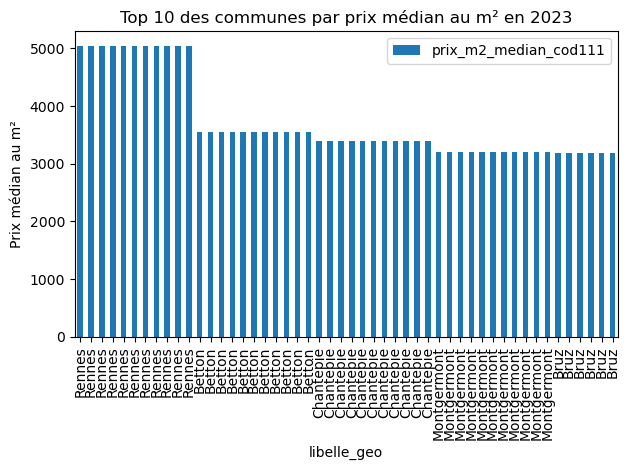


Aperçu des indicateurs pour Rennes :


,annee_mutation,code_geo,libelle_geo,valeur_fonciere_median_cod111,prix_m2_median_cod111,surface_batie_median_cod111
0,2010,35238,Rennes,270000.0,2937.665,92.0
1,2011,35238,Rennes,296000.0,3145.450,94.0
2,2012,35238,Rennes,293500.0,3274.260,92.0
3,2013,35238,Rennes,313123.5,3362.285,92.5
4,2014,35238,Rennes,300000.0,3359.380,90.0


<Figure size 1000x600 with 0 Axes>

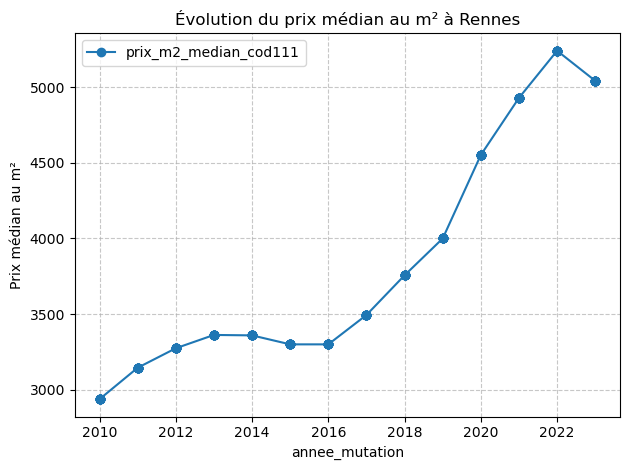


Comparaison des prix médians au m² entre communes :


libelle_geo,Betton,Bruz,Chantepie,Rennes
annee_mutation,,,,
2010,2377.050,2230.140,2427.435,2937.665
2011,2389.830,2347.230,2533.795,3145.450
2012,2440.190,2273.630,2614.680,3274.260
2013,2473.450,2168.300,2626.740,3362.285
2014,2446.425,2277.110,2500.000,3359.380
2015,2403.010,2280.700,2557.125,3300.000
2016,2425.930,2250.465,2433.700,3300.000
2017,2608.790,2303.175,2493.670,3494.185
2018,2759.570,2387.225,2652.115,3756.720


<Figure size 1200x700 with 0 Axes>

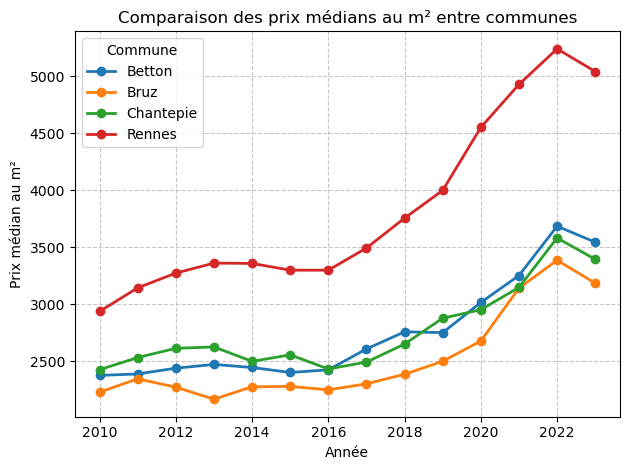

<Figure size 640x480 with 0 Axes>

In [8]:
# Chargement des variables d'environnement
load_dotenv('.env')
API_PASSWORD = os.getenv("API_PASSWORD")
API_URL = "http://127.0.0.1:8000"

# Initialisation de la session
session = requests.Session()

# AUTHENTIFICATION : Récupération du token JWT
response = session.post(f"{API_URL}/token", json={"password": API_PASSWORD, "duration": 3600})
if response.status_code == 200:
    token = response.json()["token"]
    session.headers.update({"Authorization": f"Bearer {token}"})
    print("Authentification réussie !")
else:
    print("Échec de l'authentification :", response.json())
    token = None

# Vérifier si l'authentification a réussi avant de poursuivre
if token:
    
    # REQUÊTE : Récupération des indicateurs fonciers pour une année spécifique
    annee = 2023
    response = session.get(f"{API_URL}/mongo/indicateurs-foncieres", params={"annee_mutation": annee})
    
    if response.status_code == 200:
        indicateurs_annee = response.json()
        print(f"Nombre d'indicateurs trouvés pour l'année {annee} :", len(indicateurs_annee))
    else:
        print(f"Erreur lors de la récupération des indicateurs pour l'année {annee} :", response.json())
    
    # REQUÊTE : Récupération des indicateurs fonciers pour une commune spécifique
    commune = "Rennes"
    response = session.get(f"{API_URL}/mongo/indicateurs-foncieres", params={"libelle_geo": commune})
    
    if response.status_code == 200:
        indicateurs_commune = response.json()
        print(f"Nombre d'indicateurs trouvés pour la commune {commune} :", len(indicateurs_commune))
    else:
        print(f"Erreur lors de la récupération des indicateurs pour la commune {commune} :", response.json())
    
    # ANALYSE : Conversion en DataFrame pour affichage et analyse
    if 'indicateurs_annee' in locals() and indicateurs_annee:
        df_annee = pd.DataFrame(indicateurs_annee)
        print("\nAperçu des indicateurs pour l'année spécifiée :")
        display(df_annee.head())

        def extract_value(val):
            if isinstance(val, dict):
                return val.get("value", None)  # Remplace "value" par la bonne clé si nécessaire
            return val
        
        df_annee["prix_m2_median_cod111"] = df_annee["prix_m2_median_cod111"].apply(extract_value)
        df_annee["prix_m2_median_cod111"] = pd.to_numeric(df_annee["prix_m2_median_cod111"], errors="coerce")
        df_annee = df_annee.dropna(subset=["prix_m2_median_cod111"])  # Supprime les NaN restants
        
        # Analyse des prix médians par commune pour l'année spécifiée
        if 'prix_m2_median_cod111' in df_annee.columns and 'libelle_geo' in df_annee.columns:
            plt.figure(figsize=(20, 6))
            df_annee.sort_values('prix_m2_median_cod111', ascending=False).head(50).plot(
                kind='bar', 
                x='libelle_geo', 
                y='prix_m2_median_cod111',
                title=f'Top 10 des communes par prix médian au m² en {annee}'
            )
            plt.ylabel('Prix médian au m²')
            plt.tight_layout()
            plt.show()
    
    if 'indicateurs_commune' in locals() and indicateurs_commune:
        df_commune = pd.DataFrame(indicateurs_commune)
        print(f"\nAperçu des indicateurs pour {commune} :")
        display(df_commune.head())
        
        # Évolution des prix sur plusieurs années pour la commune spécifiée
        if 'prix_m2_median_cod111' in df_commune.columns and 'annee_mutation' in df_commune.columns:
            plt.figure(figsize=(10, 6))
            df_commune.sort_values('annee_mutation').plot(
                kind='line', 
                x='annee_mutation', 
                y='prix_m2_median_cod111',
                marker='o',
                title=f'Évolution du prix médian au m² à {commune}'
            )
            plt.ylabel('Prix médian au m²')
            plt.grid(True, linestyle='--', alpha=0.7)
            plt.tight_layout()
            plt.show()
            
    # REQUÊTE BONUS : Comparaison de plusieurs communes
    communes = ["Rennes", 'Bruz', 'Chantepie', 'Betton']
    resultats_comparaison = []
    
    for commune in communes:
        response = session.get(f"{API_URL}/mongo/indicateurs-foncieres", params={"libelle_geo": commune})
        if response.status_code == 200:
            data = response.json()
            resultats_comparaison.extend(data)
    
    if resultats_comparaison:
        df_comparaison = pd.DataFrame(resultats_comparaison)
        
        # Pivotement pour comparer les prix par commune et par année
        if 'prix_m2_median_cod111' in df_comparaison.columns and 'libelle_geo' in df_comparaison.columns:
            pivot = df_comparaison.pivot_table(
                index='annee_mutation', 
                columns='libelle_geo', 
                values='prix_m2_median_cod111'
            )
            
            print("\nComparaison des prix médians au m² entre communes :")
            display(pivot)
            
            # Visualisation de la comparaison
            plt.figure(figsize=(12, 7))
            pivot.plot(marker='o', linewidth=2)
            plt.title('Comparaison des prix médians au m² entre communes')
            plt.ylabel('Prix médian au m²')
            plt.xlabel('Année')
            plt.grid(True, linestyle='--', alpha=0.7)
            plt.legend(title='Commune')
            plt.tight_layout()
            plt.show()
            plt.savefig('fig_prix_au_m2_medians.png')